# Trajectory Optimization of Pneumatic Cylinder


In [9]:
# import libraries
import sympy as sym
import numpy as np

from IPython.display import display 

In [10]:
# symbolic variables

# system parameters
X0,Y0 = sym.symbols(['X0','Y0']) # original position of mass
g = sym.symbols('g')
m1 = sym.symbols('m1') # mass of block

# generalized coordinates
# assume th1 = x, dth1 = v; ddth1 = a

th1 = sym.symbols('theta1') #position
dth1 = sym.symbols('\dot{\\theta}_{1}') #velocity
ddth1 = sym.symbols('\ddot{\\theta}_{1}') #acceleration

q = sym.Matrix([th1]) #group into matrices
dq = sym.Matrix([dth1])
ddq = sym.Matrix([ddth1])

display(ddq) 

Matrix([[\ddot{\theta}_{1}]])

In [11]:
# STEP 1: write expressions for the system space coordinates in terms of the generalized coordinates and parameters
th1a = th1 
x1 = X0 + th1a

In [12]:
# STEP 2: generate expressions for the system space velocities
p1 = sym.Matrix([x1,th1])
[dx1,dth1a] = p1.jacobian(q)*dq

display(dx1)

\dot{\theta}_{1}

In [13]:
# STEP 3: generate expressions for the kinetic and potential energy
T = sym.Matrix([0.5*m1*(dx1**2)])
V = sym.Matrix([0]) 

In [14]:
# STEP 4: calculate each term of the Lagrange equation

Lg1 = sym.zeros(1,len(q))
for i in range(len(q)):
    dT_ddq = sym.diff(T,dq[i]) 
    Lg1[i] = dT_ddq.jacobian(q)*dq + dT_ddq.jacobian(dq)*ddq 

Lg3 = T.jacobian(q)

Lg4 = V.jacobian(q) 

# STEP 5: calculate generalized forces
# applying a horizontal force
F = sym.symbols('F')

FF = sym.Matrix([[F],[0],[0]])

rF = sym.Matrix([[X0 + th1],
                 [0],
                 [0]])

JF = rF.jacobian(q)

QF = JF.transpose()*FF


EOM = Lg1 - Lg3 + Lg4 - QF.transpose()

display(EOM) # display equations of  motion

Matrix([[-F + 1.0*\ddot{\theta}_{1}*m1]])

In [15]:
N = 100

#forces
h = 0.01
t = np.arange(0,N*h,h)

F_arr = 10*t    # not to sure what this does 

#initial conditions
th10 = 0
dth10 = 0

#parameters
X0val = 0
Y0val = 0

parameter_values = [(X0,X0val),(Y0,Y0val),(g,9.81),(m1,1)]

th1ar = [th10]
dth1ar = [dth10]

for i in range(1,N):
    # substitute parameter values and previous conditions into the EOM 
    past = [(th1,th1ar[i-1]),(dth1,dth1ar[i-1])]
    forces = [(F,F_arr[i-1])] 
    EOM_sub = EOM.subs(parameter_values).subs(past).subs(forces)
    
    # solve for the acceleration
    acc = sym.solve(EOM_sub,[ddth1])
    
    # integrate for the next velocity and position    
    dth1ar.append(float(dth1ar[i-1]+h*acc[ddth1]))   
    th1ar.append(float(th1ar[i-1]+h*dth1ar[i]))

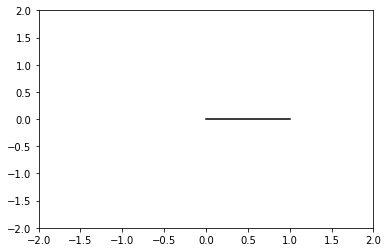

In [16]:
#animate model
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from IPython.display import HTML
%matplotlib inline

fig1, ax1 = plt.subplots(1,1) #create axes

def plot_block(i,th1_in,ax): #update function for animation
    ax.clear()
    ax.set_xlim([-2,2])
    ax.set_ylim([-2,2])
    
    #plot mass
    m1topx = X0val
    m1bottomx = X0val + th1_in[i]
    ax.plot([m1topx,m1bottomx],color='xkcd:black')
    
update = lambda i: plot_block(i,th1ar,ax1) #lambdify update function

animate = ani.FuncAnimation(fig1,update,range(N),interval = 50,repeat=True)

#HTML(animate.to_html5_video()) #you need to convert the animation to HTML5 to embed it in the notebook